## Observations and Insights 

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
#The three observations that have been made based on the figures are: the tumor sized decreased over a longer period time when a mouse is treated with Capomulin. This could mean that this drug treatment is effective and could be further studied. The next inference is that infubinol had one outlier while the rest of the drug data did not. This could mean that the data was skewed or the conditions were altered and not kept the same among test groups. Lastly, there is a high correlation "r" value for tumor weight and capomulin. Overall, there is a signficance in drug treatment and tumor size.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count = len(study_results["Mouse ID"].unique())
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_data = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[duplicate_mouse_data["Mouse ID" == "g989"]]

KeyError: False

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
sorted_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
sorted_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(sorted_data["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_data = sorted_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_data = summary_data[["mean", "std"]]
summary_data["var"] =  sorted_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_data["median"] =  sorted_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_data["sem"] =  sorted_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_data = summary_data[["mean", "median","var", "std","sem"]]
summary_data


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary_df = summary_data.agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary_df

,mean,median,var,std,sem
mean,50.975982,49.902123,47.858440,6.821103,0.502785
median,53.060651,51.819532,46.192684,6.794337,0.530365
var,31.598895,22.140931,256.269612,1.478889,0.010707
std,5.621289,4.705415,16.008423,1.216096,0.103473
sem,1.777608,1.487983,5.062308,0.384563,0.032721


## Bar and Pie Charts

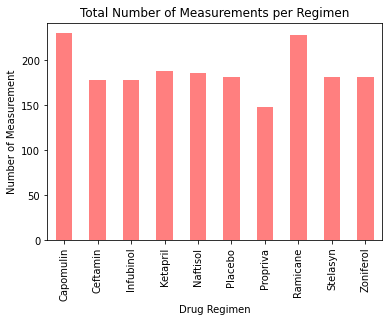

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_drugs_df = sorted_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
all_drugs_df
drug_regimen_bar = all_drugs_df.plot(kind='bar', alpha= .50, color='Red')
plt.ylabel("Number of Measurement")
plt.title("Total Number of Measurements per Regimen")
plt.show()

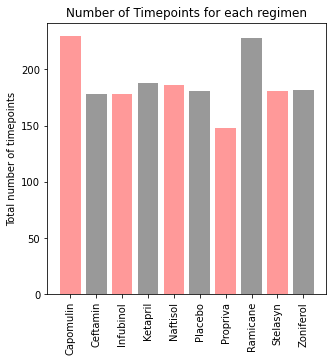

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = all_drugs_df.index
yaxis = all_drugs_df.values

plt.bar(xaxis, yaxis, color=['red','black'], alpha=0.4)
plt.xticks(rotation='vertical')
plt.title("Number of Timepoints for each regimen")
plt.ylabel("Total number of timepoints")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()


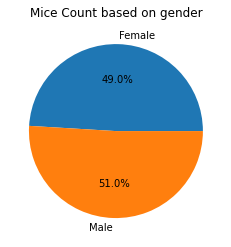

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

genderTable = sorted_data.groupby('Sex')['Mouse ID'].count()
chart = genderTable.plot(kind='pie',title='Mice Count based on gender', autopct="%1.1f%%")
plt.rcParams["figure.figsize"] = (8,8)
chart.set_ylabel('')
plt.show()

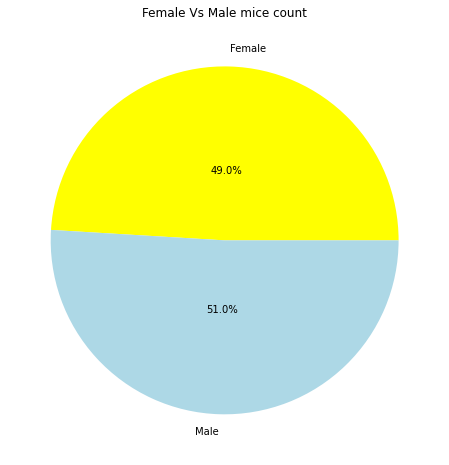

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = genderTable
labels = genderTable.index

plt.pie(counts, labels=labels, autopct="%1.1f%%", pctdistance=0.4, colors=['yellow', 'lightblue'])
plt.title("Female Vs Male mice count")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()


## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest timepoint) for each mouse
max_timepoint_df = pd.DataFrame(sorted_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df

#merge 
merged_df = pd.merge(sorted_data, max_timepoint_df, on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [55]:
#Put treatments into a list for loop 

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    
    #Locate the rows which contain mice on each drug and get the tumor volumes 
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    #add subset 
    
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    
    #create a series that lists all final tumor values
    values = final_volume_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(values)
    

    #Determine outliers using upper and lower bounds
    
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f'IQR for {treatment}: {iqr}')
    
    #find upper and lower bounds to identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


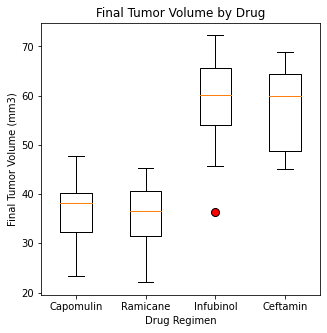

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#outlier
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
fig1,axe1=plt.subplots()
plt.boxplot(tumor_vol_data, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

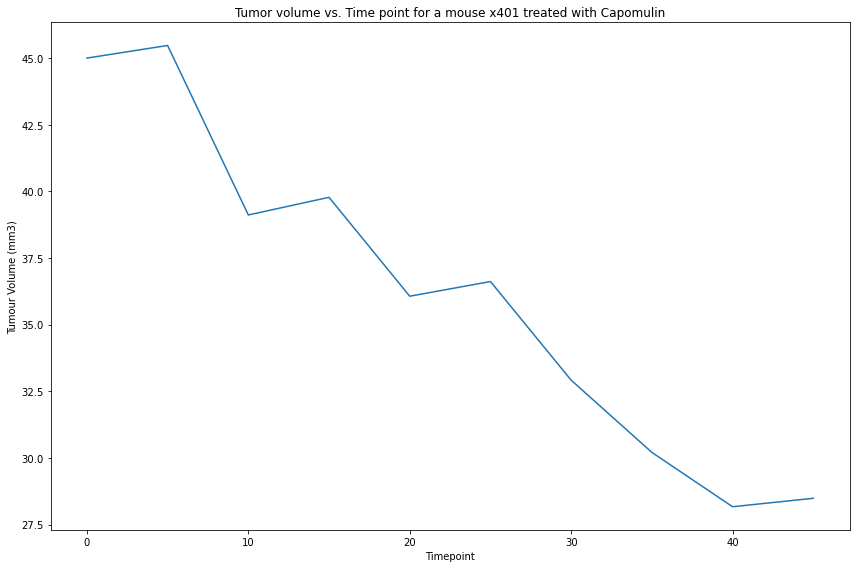

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouseID = 'x401'
capomulin_mouseID_df = sorted_data[sorted_data['Mouse ID']==capomulin_mouseID]
x_axis = capomulin_mouseID_df['Timepoint']
y_axis = capomulin_mouseID_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title(f"Tumor volume vs. Time point for a mouse {capomulin_mouseID} treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel("Tumour Volume (mm3)")
plt.tight_layout()
plt.show()

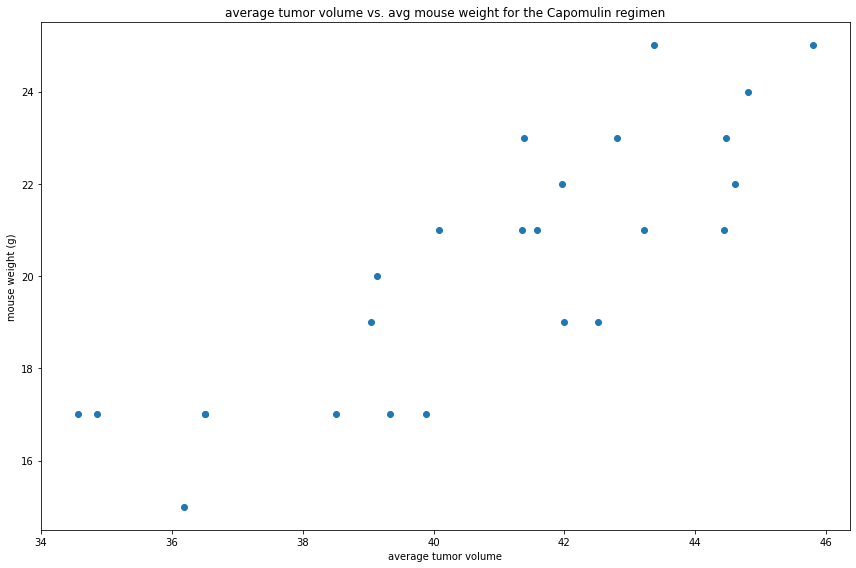

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = sorted_data[sorted_data['Drug Regimen']=='Capomulin']
mouse_group = capomulin_regimen.groupby(['Mouse ID'])
avg_tumor_vol = mouse_group['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_group['Weight (g)'].mean()

plt.scatter(avg_tumor_vol, mouse_weight)
plt.title(f"average tumor volume vs. avg mouse weight for the Capomulin regimen")
plt.xlabel('average tumor volume')
plt.ylabel("mouse weight (g)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


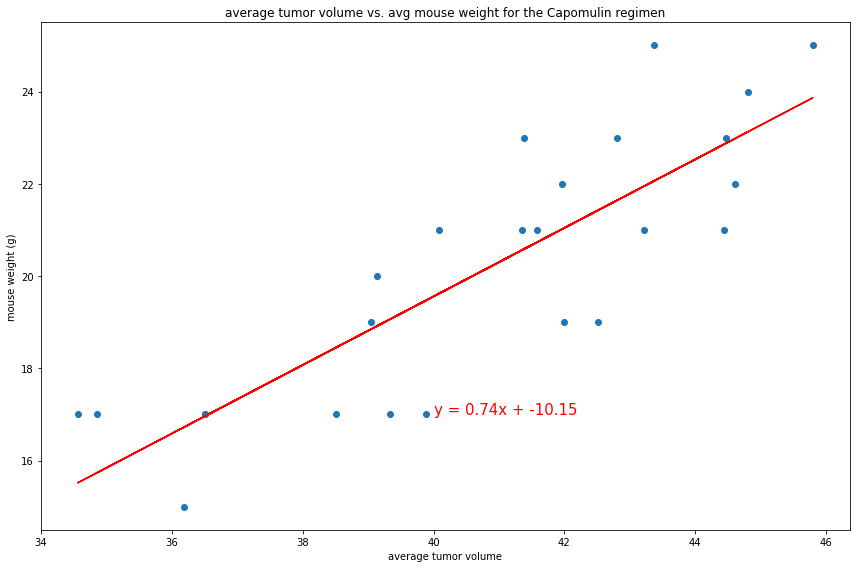

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol, mouse_weight)
regress_values = avg_tumor_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(avg_tumor_vol, mouse_weight)
plt.plot(avg_tumor_vol,regress_values,"r-")
plt.title(f"average tumor volume vs. avg mouse weight for the Capomulin regimen")
plt.xlabel('average tumor volume')
plt.ylabel("mouse weight (g)")
plt.tight_layout()
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
plt.show()